In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/homealone2020/Test.csv
/kaggle/input/homealone2020/Train.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/homealone2020/Train.csv')
test_data=pd.read_csv('/kaggle/input/homealone2020/Test.csv')
train_data.head()
# test_data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL ELECTORS
0,Lakshadweep,LAKSHADWEEP,DR. MOHAMMED SADIQUE KP,0,JD(U),MALE,0,64,ST,Post Graduate,"Rs 4,97,83,111\n ~ 4 Crore+","Rs 28,87,460\n ~ 28 Lacs+",55189
1,Lakshadweep,LAKSHADWEEP,MOHAMMED FAIZAL PP,1,NCP,MALE,2,43,ST,Post Graduate,"Rs 9,38,641\n ~ 9 Lacs+",Rs 0\n ~,55189
2,Lakshadweep,LAKSHADWEEP,HAMDULLAH SAYEED,0,INC,MALE,0,36,ST,Graduate Professional,"Rs 9,50,47,817\n ~ 9 Crore+","Rs 4,45,771\n ~ 4 Lacs+",55189
3,Daman & Diu,DAMAN & DIU,LALUBHAI BABUBHAI PATEL,1,BJP,MALE,0,63,GENERAL,8th Pass,"Rs 21,39,93,750\n ~ 21 Crore+","Rs 99,69,514\n ~ 99 Lacs+",121740
4,Jammu & Kashmir,LADAKH,SAJJAD HUSSAIN,0,IND,MALE,0,37,ST,Post Graduate,"Rs 1,09,000\n ~ 1 Lacs+",Rs 0\n ~,179232


In [3]:
train_data.dtypes

STATE              object
CONSTITUENCY       object
NAME               object
WINNER              int64
PARTY              object
GENDER             object
CRIMINAL\nCASES    object
AGE                 int64
CATEGORY           object
EDUCATION          object
ASSETS             object
LIABILITIES        object
TOTAL ELECTORS      int64
dtype: object

In [4]:
# dummy_data=pd.get_dummies(train_data)

In [5]:
train_data["CRIMINAL\nCASES"]=pd.to_numeric(train_data["CRIMINAL\nCASES"], errors='coerce')
meanval=int(train_data["CRIMINAL\nCASES"].median())

train_data["CRIMINAL\nCASES"] = train_data["CRIMINAL\nCASES"].fillna(int(meanval))

test_data["CRIMINAL\nCASES"]=pd.to_numeric(test_data["CRIMINAL\nCASES"], errors='coerce')
meanval=int(test_data["CRIMINAL\nCASES"].median())

test_data["CRIMINAL\nCASES"] = test_data["CRIMINAL\nCASES"].fillna(int(meanval))




In [6]:
train_data['CONSTITUENCY'] = pd.Categorical(train_data['CONSTITUENCY'])
train_data['CONSTITUENCY'] = train_data.CONSTITUENCY.cat.codes

test_data['CONSTITUENCY'] = pd.Categorical(test_data['CONSTITUENCY'])
test_data['CONSTITUENCY'] = test_data.CONSTITUENCY.cat.codes

In [7]:
train_data.pop('STATE')
test_data.pop('STATE')

# train_data['STATE'] = pd.Categorical(train_data['STATE'])
# train_data['STATE'] = train_data.STATE.cat.codes

# test_data['STATE'] = pd.Categorical(test_data['STATE'])
# test_data['STATE'] = test_data.STATE.cat.codes

0            Bihar
1            Bihar
2          Gujarat
3          Gujarat
4      Uttarakhand
          ...     
492      Karnataka
493      Telangana
494      Telangana
495      Telangana
496      Telangana
Name: STATE, Length: 497, dtype: object

In [8]:
name_column=train_data.pop('NAME')
test_name_column=test_data.pop('NAME')

In [9]:
train_data['PARTY'] = pd.Categorical(train_data['PARTY'])
train_data['PARTY'] = train_data.PARTY.cat.codes

test_data['PARTY'] = pd.Categorical(test_data['PARTY'])
test_data['PARTY'] = test_data.PARTY.cat.codes

In [10]:
train_data.pop('GENDER')
test_data.pop('GENDER')

# train_data['GENDER'] = pd.Categorical(train_data['GENDER'])
# train_data['GENDER'] = train_data.GENDER.cat.codes

# test_data['GENDER'] = pd.Categorical(test_data['GENDER'])
# test_data['GENDER'] = test_data.GENDER.cat.codes

0      MALE
1      MALE
2      MALE
3      MALE
4      MALE
       ... 
492    MALE
493    MALE
494    MALE
495    MALE
496    MALE
Name: GENDER, Length: 497, dtype: object

In [11]:
train_data['CATEGORY'] = pd.Categorical(train_data['CATEGORY'])
train_data['CATEGORY'] = train_data.CATEGORY.cat.codes

test_data['CATEGORY'] = pd.Categorical(test_data['CATEGORY'])
test_data['CATEGORY'] = test_data.CATEGORY.cat.codes

In [12]:

for i in range (len(train_data)):
    if train_data.at[i, 'EDUCATION']=="Not Available":
        train_data.at[i, 'EDUCATION']=train_data['EDUCATION'].value_counts().idxmax()

train_data['EDUCATION'] = pd.Categorical(train_data['EDUCATION'])
train_data['EDUCATION'] = train_data.EDUCATION.cat.codes        
train_data.at[48, 'EDUCATION']


for i in range (len(test_data)):
    if test_data.at[i, 'EDUCATION']=="Not Available":
        test_data.at[i, 'EDUCATION']=test_data['EDUCATION'].value_counts().idxmax()

test_data['EDUCATION'] = pd.Categorical(test_data['EDUCATION'])
test_data['EDUCATION'] = test_data.EDUCATION.cat.codes        
test_data.at[48, 'EDUCATION']


5

In [13]:
train_data['ASSETS'] = train_data['ASSETS'].str.split('\n').str[0]
train_data['ASSETS'] = train_data['ASSETS'].str.replace('Rs ', '', regex=True)

train_data['ASSETS'] = train_data['ASSETS'].str.split(',').str.join('')
train_data['ASSETS'] = pd.to_numeric(train_data['ASSETS'],errors='coerce')

train_data["ASSETS"] = train_data["ASSETS"].fillna(train_data["ASSETS"].median())

train_data['LIABILITIES'] = train_data['LIABILITIES'].str.split('\n').str[0]
train_data['LIABILITIES'] = train_data['LIABILITIES'].str.replace('Rs ', '', regex=True)


train_data['LIABILITIES'] = train_data['LIABILITIES'].str.split(',').str.join('')
train_data['LIABILITIES'] = pd.to_numeric(train_data['LIABILITIES'],errors='coerce')
train_data["LIABILITIES"] = train_data["LIABILITIES"].fillna(train_data["LIABILITIES"].median())



test_data['ASSETS'] = test_data['ASSETS'].str.split('\n').str[0]
test_data['ASSETS'] = test_data['ASSETS'].str.replace('Rs ', '', regex=True)

test_data['ASSETS'] = test_data['ASSETS'].str.split(',').str.join('')
test_data['ASSETS'] = pd.to_numeric(test_data['ASSETS'],errors='coerce')

test_data["ASSETS"] = test_data["ASSETS"].fillna(test_data["ASSETS"].median())

test_data['LIABILITIES'] = test_data['LIABILITIES'].str.split('\n').str[0]
test_data['LIABILITIES'] = test_data['LIABILITIES'].str.replace('Rs ', '', regex=True)


test_data['LIABILITIES'] = test_data['LIABILITIES'].str.split(',').str.join('')
test_data['LIABILITIES'] = pd.to_numeric(test_data['LIABILITIES'],errors='coerce')
test_data["LIABILITIES"] = test_data["LIABILITIES"].fillna(test_data["LIABILITIES"].median())


In [14]:
train_data.head()

,CONSTITUENCY,WINNER,PARTY,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL ELECTORS
0,224,0,49,0.0,64,2,10,49783111.0,2887460.0,55189
1,224,1,73,2.0,43,2,10,938641.0,0.0,55189
2,224,0,42,0.0,36,2,6,95047817.0,445771.0,55189
3,101,1,26,0.0,63,0,3,213993750.0,9969514.0,121740
4,222,0,43,0.0,37,2,10,109000.0,0.0,179232


In [15]:

Y1 = train_data.pop('WINNER')
X1 = train_data

In [16]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,Y1, test_size = 0.2,random_state=42)
y_test1

1116    0
1368    0
422     0
413     0
451     0
       ..
983     0
799     0
1265    0
1150    1
824     0
Name: WINNER, Length: 300, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=400,max_features='auto',random_state=0,
                          max_depth=10)
clf.fit(x_train1,y_train1)

y_predic=clf.predict(x_test1)
y_train_predic = clf.predict(x_train1)
y_train_predic

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
# calculate accuracy
from sklearn import metrics

print("train accuracy= ",metrics.accuracy_score(y_train1, y_train_predic))
print("test accuracy= ", metrics.accuracy_score(y_test1, y_predic))

train accuracy=  0.7775
test accuracy=  0.7866666666666666


In [19]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print(classification_report(y_test1, y_predic, target_names=target_names))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87       230
           1       0.65      0.19      0.29        70

    accuracy                           0.79       300
   macro avg       0.72      0.58      0.58       300
weighted avg       0.76      0.79      0.74       300



Feature ranking:
1. feature 1 (0.510843)
2. feature 6 (0.274385)
3. feature 7 (0.092196)
4. feature 8 (0.035318)
5. feature 3 (0.030893)
6. feature 2 (0.029636)
7. feature 0 (0.019684)
8. feature 5 (0.003788)
9. feature 4 (0.003258)


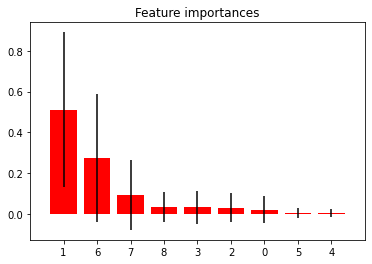

In [20]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train1.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train1.shape[1]), indices)
plt.xlim([-1, x_train1.shape[1]])
plt.show()

In [21]:
test_predic=clf.predict(test_data)

out = pd.DataFrame()
out['NAME'] = test_name_column.copy()
out['WINNER'] = test_predic.copy()
out
# dftnew
out.to_csv('HA20_3bugs.csv', index=False)


In [22]:
# from sklearn.externals.joblib import parallel_backend

# from sklearn.model_selection import RandomizedSearchCV
# # number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # number of features at every split
# max_features = ['auto', 'sqrt']

# # max depth
# max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
# max_depth.append(None)
# # create random grid
# random_grid = {
#  'n_estimators': n_estimators,
#  'max_features': max_features,
#  'max_depth': max_depth
#  }
# # Random search of parameters
# rfc_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the model

# with parallel_backend('threading'):
#     rfc_random.fit(x_train1, y_train1)


# # rfc_random.fit(X_train, y_train)




# # print results
# print(rfc_random.best_params_)
